In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import scipy
from scipy.spatial import HalfspaceIntersection
from scipy.spatial import ConvexHull

from scipy.stats import truncnorm

import arviz

from DikinSamplers import RandomWalk, LangevinSampler

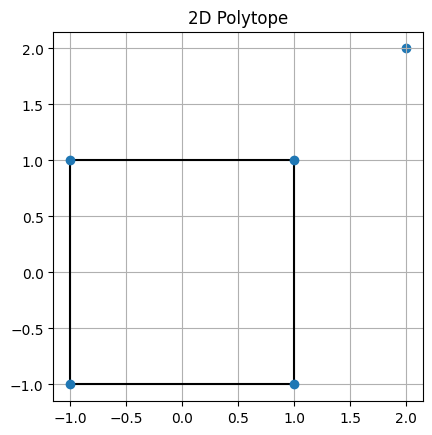

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import HalfspaceIntersection
from scipy.spatial import ConvexHull

# Example A: n x 2 matrix
A = np.array([
    [1, 0],
    [-1, 0],
    [0, 1],
    [0, -1]
])

b = np.ones(len(A))  # a_i x <= 1

halfspaces = np.hstack((A, -b[:, None]))

# Feasible interior point (must strictly satisfy all constraints)
interior_point = np.array([0.0, 0.0])  # Make sure this is inside the polytope

hs = HalfspaceIntersection(halfspaces, interior_point)

# Plot
fig, ax = plt.subplots()
for simplex in ConvexHull(hs.intersections).simplices:
    points = hs.intersections[simplex]
    ax.plot(points[:, 0], points[:, 1], 'k-')
ax.plot(*zip(*hs.intersections), 'o')  # Vertices
ax.set_aspect('equal')
plt.grid(True)
plt.title("2D Polytope")
plt.scatter(2, 2)
plt.show()

In [16]:
num_iters = 10_000

log_pdf = lambda x: -0.5 * torch.linalg.norm(x, axis=-1) ** 2
sampler = LangevinSampler(0.05, torch.tensor(A, dtype=torch.float64), log_pdf, e=1e-3, include_lazification=False)
history1 = sampler.run(num_iters)

log_pdf = lambda x: -0.5 * torch.linalg.norm(x, axis=-1) ** 2 / (2 * 0.5 ** 2)
sampler = LangevinSampler(0.05, torch.tensor(A, dtype=torch.float64), log_pdf, e=1e-3, include_lazification=False)
history2 = sampler.run(num_iters)

log_pdf = lambda x: -0.5 * torch.linalg.norm(x, axis=-1) ** 2 / (2 * 0.1 ** 2)
sampler = LangevinSampler(0.05, torch.tensor(A, dtype=torch.float64), log_pdf, e=1e-3, include_lazification=False)
history2 = sampler.run(num_iters)

In [17]:
np.exp(-0.5 * (np.linalg.norm(history1, axis=1) ** 2) * (1 - 1 / (0.5 ** 2))).mean()

np.float32(2.6413047)

In [18]:
np.exp(-0.5 * (np.linalg.norm(history1, axis=1) ** 2) * (1 / (0.1 ** 2) - 1 / (0.5 ** 2))).mean()

np.float32(0.025044585)

In [19]:
2.6413047 * 0.025044585

0.0661503800700495